# Import

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

# Read Data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Define Variable and Data Holder

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [5]:
y = tf.nn.softmax(tf.matmul(x,W) + b)
y_ = tf.placeholder("float", [None,10])

# Define Network

In [6]:
def weight(shape):
  w_init = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(w_init)

def bias(shape):
  b_init = tf.constant(0.1, shape=shape)
  return tf.Variable(b_init)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [7]:
x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = weight([5, 5, 1, 16])
b_conv1 = bias([16])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight([5, 5, 16, 32])
b_conv2 = bias([32])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight([7 * 7 * 32, 1024])
b_fc1 = bias([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*32])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight([1024, 10])
b_fc2 = bias([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# Define Evaluation

In [155]:
LEARNING_RATE = 1e-4
OPTIMIZER = 'Adam'

In [156]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
if OPTIMIZER == 'Adam':
    train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy)
elif OPTIMIZER == 'RMSprop':
    train_step = tf.train.RMSPropOptimizer(LEARNING_RATE).minimize(cross_entropy)
elif OPTIMIZER == 'SGD':
    train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

# Start Training

In [157]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [158]:
step = []
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

In [159]:
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    test_accuracy = accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
    train_loss = cross_entropy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    test_loss = cross_entropy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
    step.append(i)
    train_loss_list.append(train_loss/50)
    train_acc_list.append(train_accuracy)
    test_loss_list.append(test_loss/len(mnist.test.labels))
    test_acc_list.append(test_accuracy)
    print('step ' + str(i) + '   train loss = ' + str(train_loss/50) + '   test loss = ' + str(test_loss/len(mnist.test.labels)) + '   train accuracy = ' + str(train_accuracy) + '   test accuracy = ' + str(test_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0   train loss = 3.33882110596   test loss = 3.1517984375   train accuracy = 0.06   test accuracy = 0.1054
step 100   train loss = 1.21622673035   test loss = 1.20957246094   train accuracy = 0.7   test accuracy = 0.7195
step 200   train loss = 0.624157943726   test loss = 0.620820800781   train accuracy = 0.84   test accuracy = 0.8609
step 300   train loss = 0.595752639771   test loss = 0.420854736328   train accuracy = 0.84   test accuracy = 0.9001
step 400   train loss = 0.233947811127   test loss = 0.338436523438   train accuracy = 0.96   test accuracy = 0.9126
step 500   train loss = 0.394334869385   test loss = 0.285174365234   train accuracy = 0.88   test accuracy = 0.9223
step 600   train loss = 0.243092556   test loss = 0.255854248047   train accuracy = 0.94   test accuracy = 0.9266
step 700   train loss = 0.183209495544   test loss = 0.236890649414   train accuracy = 0.96   test accuracy = 0.9324
step 800   train loss = 0.215654430389   test loss = 0.21802265625   train 

step 7000   train loss = 0.0217023968697   test loss = 0.0458990661621   train accuracy = 1.0   test accuracy = 0.9852
step 7100   train loss = 0.0172999191284   test loss = 0.0465972229004   train accuracy = 1.0   test accuracy = 0.9854
step 7200   train loss = 0.0161201357841   test loss = 0.0439018066406   train accuracy = 1.0   test accuracy = 0.9861
step 7300   train loss = 0.0215807437897   test loss = 0.0435237243652   train accuracy = 1.0   test accuracy = 0.9858
step 7400   train loss = 0.0993255710602   test loss = 0.0451186828613   train accuracy = 0.96   test accuracy = 0.9845
step 7500   train loss = 0.079494342804   test loss = 0.0439194976807   train accuracy = 0.98   test accuracy = 0.9865
step 7600   train loss = 0.049089307785   test loss = 0.0419481109619   train accuracy = 0.98   test accuracy = 0.9866
step 7700   train loss = 0.0616021585464   test loss = 0.0428666442871   train accuracy = 0.96   test accuracy = 0.9866
step 7800   train loss = 0.0190033698082   tes

step 13900   train loss = 0.000952779501677   test loss = 0.0287721130371   train accuracy = 1.0   test accuracy = 0.9903
step 14000   train loss = 0.00167700156569   test loss = 0.0285589416504   train accuracy = 1.0   test accuracy = 0.9907
step 14100   train loss = 0.0828875732422   test loss = 0.0289452697754   train accuracy = 0.96   test accuracy = 0.9908
step 14200   train loss = 0.00323359429836   test loss = 0.0298351318359   train accuracy = 1.0   test accuracy = 0.9904
step 14300   train loss = 0.0142393016815   test loss = 0.0280242279053   train accuracy = 1.0   test accuracy = 0.9905
step 14400   train loss = 0.0116338849068   test loss = 0.0280749694824   train accuracy = 1.0   test accuracy = 0.9904
step 14500   train loss = 0.0590096378326   test loss = 0.0290629760742   train accuracy = 0.98   test accuracy = 0.9904
step 14600   train loss = 0.0135373616219   test loss = 0.0325624176025   train accuracy = 1.0   test accuracy = 0.9893
step 14700   train loss = 0.009066

# Plot

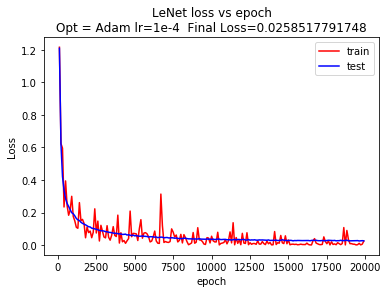

In [160]:
plt.figure()
plt.title('LeNet loss vs epoch\nOpt = '+OPTIMIZER+' lr=1e-4  Final Loss='+str(test_loss_list[-1]))
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.plot(step[1:],train_loss_list[1:],'red')
plt.plot(step[1:],test_loss_list[1:],'blue')
plt.legend(['train','test'])
plt.savefig('lenet_loss_6_16_adam_e4')
plt.show()

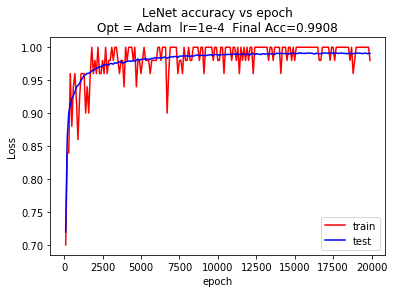

In [161]:
plt.figure()
plt.title('LeNet accuracy vs epoch\nOpt = '+OPTIMIZER+'  lr=1e-4  Final Acc='+str(test_acc_list[-1]))
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.plot(step[1:],train_acc_list[1:],'red')
plt.plot(step[1:],test_acc_list[1:],'blue')
plt.legend(['train','test'])
plt.savefig('lenet_acc_6_16_adam_e4')
plt.show()